# 数据可视化与卡方检验

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [2]:
df = pd.read_excel("赛题附件\\附件1.xlsx")
df1 = df[['呛咳', '体动', '术中其他']]
df2 = df[['是否出现了恶心呕吐的情况是','是否出现了头晕头昏头痛是','有没出现嗜睡乏力的情况呢有',
          '有没出现腹胀腹痛的情况呢有','还有没其他不舒服的情况呢有']]	

# pd.DataFrame(np.array(df.columns).reshape(37, 5)).to_excel('特征汇总.xlsx')

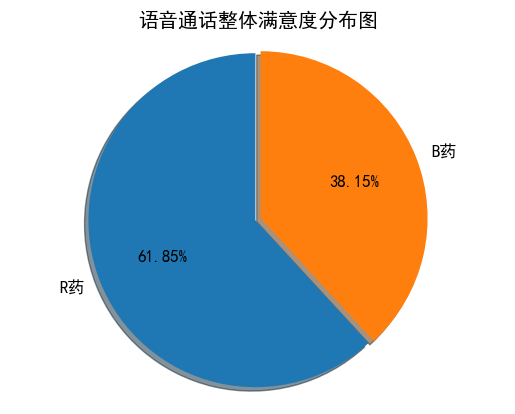

In [3]:
def pie_paint2(df, label):

    x = np.array(df[label].value_counts().reset_index())
    # 这个要改成类别对应的数字
    explode = (0.04, 0)
    plt.axis('equal') 
    plt.pie(x[:, 1], labels=x[:, 0], autopct="%1.2f%%", explode=explode, shadow=True, startangle=90,radius=1.2)
    my_circle = plt.Circle((0,0), 0.7, color='white')
    plt.title("语音通话整体满意度分布图")
    plt.axis('equal')

pie_paint2(df, "镇静药名称")

## 数据预处理

In [4]:
df1["呛咳"] = df1["呛咳"].map({"有": 1, "无": 0})
df1["体动"] = df1["体动"].map({"有": 1, "无": 0})
df1["术中其他"] = df1["术中其他"].map({"有": 1, "无": 0})

df1['镇静药名称'] = df['镇静药名称']

In [5]:
df2["是否出现了恶心呕吐的情况是"] = df2["是否出现了恶心呕吐的情况是"].map({"是": 1})
df2["是否出现了头晕头昏头痛是"] = df2["是否出现了头晕头昏头痛是"].map({"是": 1})
df2["有没出现嗜睡乏力的情况呢有"] = df2["有没出现嗜睡乏力的情况呢有"].map({"是": 1})
df2["有没出现腹胀腹痛的情况呢有"] = df2["有没出现腹胀腹痛的情况呢有"].map({"是": 1})
df2["还有没其他不舒服的情况呢有"] = df2["还有没其他不舒服的情况呢有"].map({"是": 1})

df2['是否出现了恶心呕吐的情况是'].fillna(0, inplace=True)
df2['是否出现了头晕头昏头痛是'].fillna(0, inplace=True)
df2['有没出现嗜睡乏力的情况呢有'].fillna(0, inplace=True)
df2['有没出现腹胀腹痛的情况呢有'].fillna(0, inplace=True)
df2['还有没其他不舒服的情况呢有'].fillna(0, inplace=True)

df2['镇静药名称'] = df['镇静药名称']

## 定性分析：数据可视化

In [7]:
df1.columns

Index(['呛咳', '体动', '术中其他', '镇静药名称'], dtype='object')

<Axes: xlabel='镇静药名称', ylabel='count'>

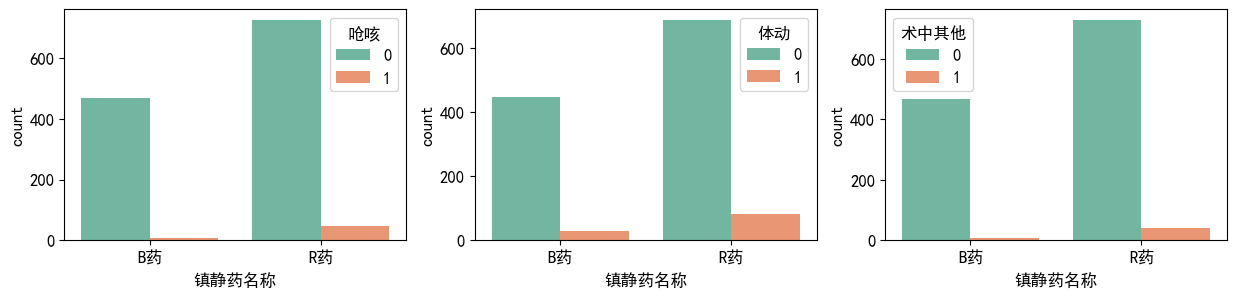

In [8]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
sns.countplot(x='镇静药名称', hue='呛咳', palette='Set2', data = df1)
plt.subplot(1, 3, 2)
sns.countplot(x='镇静药名称', hue='体动', palette='Set2', data = df1)
plt.subplot(1, 3, 3)
sns.countplot(x='镇静药名称', hue='术中其他', palette='Set2', data = df1)

In [9]:
df2.columns

Index(['是否出现了恶心呕吐的情况是', '是否出现了头晕头昏头痛是', '有没出现嗜睡乏力的情况呢有', '有没出现腹胀腹痛的情况呢有',
       '还有没其他不舒服的情况呢有', '镇静药名称'],
      dtype='object')

<Axes: xlabel='镇静药名称', ylabel='count'>

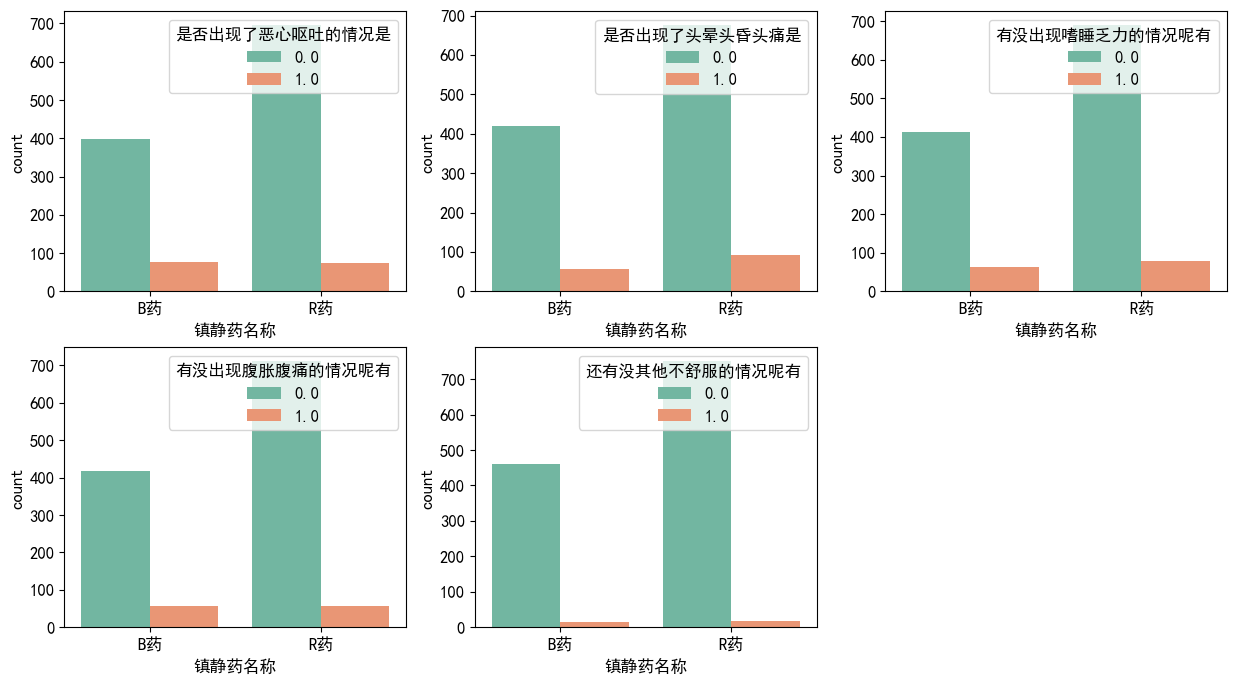

In [10]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.countplot(x='镇静药名称', hue='是否出现了恶心呕吐的情况是', palette='Set2', data = df2)
plt.subplot(2, 3, 2)
sns.countplot(x='镇静药名称', hue='是否出现了头晕头昏头痛是', palette='Set2', data = df2)
plt.subplot(2, 3, 3)
sns.countplot(x='镇静药名称', hue='有没出现嗜睡乏力的情况呢有', palette='Set2', data = df2)
plt.subplot(2, 3, 4)
sns.countplot(x='镇静药名称', hue='有没出现腹胀腹痛的情况呢有', palette='Set2', data = df2)
plt.subplot(2, 3, 5)
sns.countplot(x='镇静药名称', hue='还有没其他不舒服的情况呢有', palette='Set2', data = df2)

## 卡方检验

In [11]:
# 创建一个交叉表格，以Sex和Category作为行列索引
cross_table = pd.crosstab(df1['镇静药名称'], df1['呛咳'])

# 进行卡方检验，并返回卡方值、p值、自由度和期望值等相关信息
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)

# 输出检验结果
# print(f"卡方值: {chi2}")
# print(f"p值: {p_value}")
# print(f"自由度: {dof}")
# print(f"期望值: \n{expected}")

if p_value < 0.05:
    print('关于呛咳，两种药有显著差异')
else:
    print('关于呛咳，两种药没有显著差异')

关于呛咳，两种药有显著差异


In [12]:
# 创建一个交叉表格，以Sex和Category作为行列索引
cross_table = pd.crosstab(df1['镇静药名称'], df1['体动'])

# 进行卡方检验，并返回卡方值、p值、自由度和期望值等相关信息
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)

# 输出检验结果
# print(f"卡方值: {chi2}")
# print(f"p值: {p_value}")
# print(f"自由度: {dof}")
# print(f"期望值: \n{expected}")

if p_value < 0.05:
    print('关于体动，两种药有显著差异')
else:
    print('关于体动，两种药没有显著差异')

关于体动，两种药有显著差异


In [13]:
# 创建一个交叉表格，以Sex和Category作为行列索引
cross_table = pd.crosstab(df1['镇静药名称'], df1['术中其他'])

# 进行卡方检验，并返回卡方值、p值、自由度和期望值等相关信息
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)

# 输出检验结果
# print(f"卡方值: {chi2}")
# print(f"p值: {p_value}")
# print(f"自由度: {dof}")
# print(f"期望值: \n{expected}")

if p_value < 0.05:
    print('关于术中其他，两种药有显著差异')
else:
    print('关于术中其他，两种药没有显著差异')

关于术中其他，两种药有显著差异


In [14]:
# 创建一个交叉表格，以Sex和Category作为行列索引
cross_table = pd.crosstab(df2['镇静药名称'], df2['是否出现了恶心呕吐的情况是'])

# 进行卡方检验，并返回卡方值、p值、自由度和期望值等相关信息
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)

# 输出检验结果
# print(f"卡方值: {chi2}")
# print(f"p值: {p_value}")
# print(f"自由度: {dof}")
# print(f"期望值: \n{expected}")

if p_value < 0.05:
    print('关于术后不良反应，两种药有显著差异')
else:
    print('关于术后不良反应，两种药没有显著差异')

关于术后不良反应，两种药有显著差异


In [15]:
# 创建一个交叉表格，以Sex和Category作为行列索引
cross_table = pd.crosstab(df2['镇静药名称'], df2['是否出现了头晕头昏头痛是'])

# 进行卡方检验，并返回卡方值、p值、自由度和期望值等相关信息
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)

# 输出检验结果
# print(f"卡方值: {chi2}")
# print(f"p值: {p_value}")
# print(f"自由度: {dof}")
# print(f"期望值: \n{expected}")

if p_value < 0.05:
    print('关于术后不良反应，两种药有显著差异')
else:
    print('关于术后不良反应，两种药没有显著差异')

关于术后不良反应，两种药没有显著差异


In [16]:
# 创建一个交叉表格，以Sex和Category作为行列索引
cross_table = pd.crosstab(df2['镇静药名称'], df2['有没出现嗜睡乏力的情况呢有'])

# 进行卡方检验，并返回卡方值、p值、自由度和期望值等相关信息
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)

# 输出检验结果
# print(f"卡方值: {chi2}")
# print(f"p值: {p_value}")
# print(f"自由度: {dof}")
# print(f"期望值: \n{expected}")

if p_value < 0.05:
    print('关于术后不良反应，两种药有显著差异')
else:
    print('关于术后不良反应，两种药没有显著差异')

关于术后不良反应，两种药没有显著差异


In [17]:
# 创建一个交叉表格，以Sex和Category作为行列索引
cross_table = pd.crosstab(df2['镇静药名称'], df2['有没出现腹胀腹痛的情况呢有'])

# 进行卡方检验，并返回卡方值、p值、自由度和期望值等相关信息
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)

# 输出检验结果
# print(f"卡方值: {chi2}")
# print(f"p值: {p_value}")
# print(f"自由度: {dof}")
# print(f"期望值: \n{expected}")

if p_value < 0.05:
    print('关于术后不良反应，两种药有显著差异')
else:
    print('关于术后不良反应，两种药没有显著差异')

关于术后不良反应，两种药有显著差异


In [18]:
# 创建一个交叉表格，以Sex和Category作为行列索引
cross_table = pd.crosstab(df2['镇静药名称'], df2['还有没其他不舒服的情况呢有'])

# 进行卡方检验，并返回卡方值、p值、自由度和期望值等相关信息
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)

# 输出检验结果
# print(f"卡方值: {chi2}")
# print(f"p值: {p_value}")
# print(f"自由度: {dof}")
# print(f"期望值: \n{expected}")

if p_value < 0.05:
    print('关于术后不良反应，两种药有显著差异')
else:
    print('关于术后不良反应，两种药没有显著差异')

关于术后不良反应，两种药没有显著差异
